## Notebook 9
#### Giorgio Stucchi - 969107

In [2]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
import string
from scipy.optimize import curve_fit
import networkx as nx
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

We can solve the TSP with a **Genetic** algorithm (GA). 
To apply them we consider a population of possible paths. Each path is charachterized by a sequence of integers from 
 to 
 that encodes the travel details. For instance, the sequence [1,3,2,4,5] tells us that the salesman visits, in this order, cities 1,3,2,4 and 5, before going back to 1. Once the population is randomly generated (1000 individuals in our case) according to the given constraints, we set off the evolution by introducing selection, crossover and mutation. Basically, two individuals are extracted from the population with a probability that favors individuals with lower cost function (shorter paths); then, crossover takes place by crossing the paths of the two selected individuals and two new paths are created. The new paths substitute the old ones and are then likely to mutate through 4 possible mutations.
 
In our code we implement this operation as follows: we select individuals in the ordered population (according to the path length) with a random index given by $int(n_{ind}\times(unif(0,1))^2)$, we cross these two individuals with probability $p_{cross-over}=0.5$ and finally we mutate the offspring with probability $p_{mutation,total}=0.4$ (with each one of the 4 possible mutations having $p_{i-mutation}=0.1$).
At the end the most suitable individuals, namely the shortest paths, emerge.  

Two different maps are considered (circular and "random-in-square"). The results are shown below.

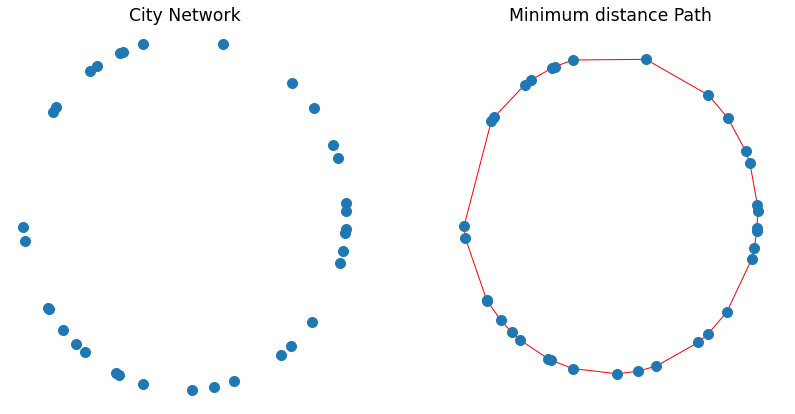

<Figure size 360x360 with 0 Axes>

In [15]:
fig, axs = plt.subplots(1,2,figsize=(14,7))

#Plotto la posizione delle città
file = open ('map_circumference.dat', 'r')
mappa = []
mappa = [line.split() for line in file]

G = nx.Graph()

for city in mappa:
    G.add_node(city[0], pos=[float(city[1]),float(city[2])])

pos = nx.get_node_attributes(G, 'pos')
plt.figure(3,figsize=(5,5)) 
nx.draw(G, ax=axs.flat[0], pos=pos, node_size=100)
axs.flat[0].set(title = "City Network");

#Plotto il miglior percorso trovato
file = open ('best_path_circumference.dat','r')
path = []
path = [line.split() for line in file]

G.add_edges_from(path)

pos = nx.get_node_attributes(G, 'pos')
plt.figure(3,figsize=(5,5)) 
nx.draw(G, ax=axs.flat[1], pos=pos, node_size=100, edge_color = 'red')
axs.flat[1].set(title = "Minimum distance Path");

plt.show()

In this case, it is evident that the solution found by the algorithm is indeed the optimal solution. We know that the fastest route that visits all points distributed on a circumference is the one that follows the circumference. However, in general, it is not guaranteed that this type of algorithm will find the absolute best solution. It certainly finds the best solution among the best solutions.

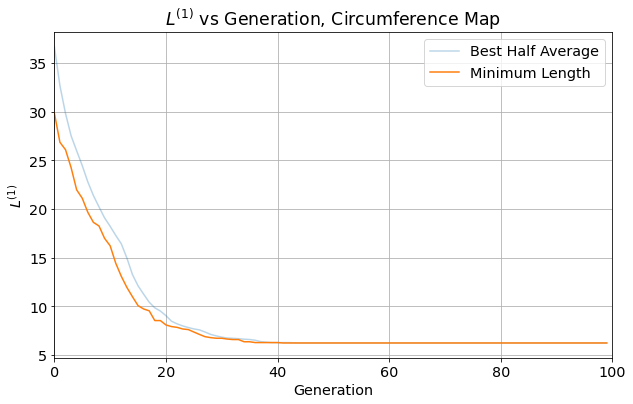

In [16]:
best = np.loadtxt("best_fitness_circumference.dat")
media = np.loadtxt("besthalf_fitness_circumference.dat")
x = np.arange(len(best))

plt.plot(x, media, label="Best Half Average", alpha=0.3)
plt.plot(x,best,label="Minimum Length")
plt.xlabel('Generation')
plt.ylabel('$L^{(1)}$')
plt.title( r'$L^{(1)}$ vs Generation, Circumference Map')
plt.grid(True)
plt.xlim(0,100)
plt.legend()
plt.show()

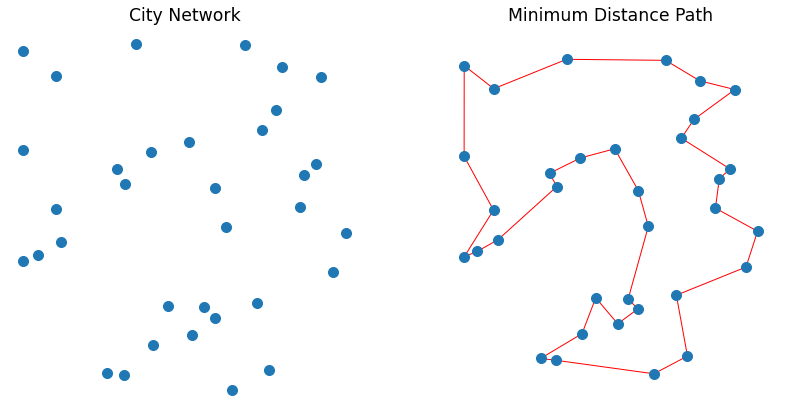

<Figure size 360x360 with 0 Axes>

In [10]:
fig, axs = plt.subplots(1,2,figsize=(14,7))

#Plotto la posizione delle città
file = open ('map_square.dat', 'r')
mappa = []
mappa = [line.split() for line in file]

G = nx.Graph()

for city in mappa:
    G.add_node(city[0], pos=[float(city[1]),float(city[2])])

pos = nx.get_node_attributes(G, 'pos')
plt.figure(3,figsize=(5,5)) 
nx.draw(G, ax=axs.flat[0], pos=pos, node_size=100)
axs.flat[0].set(title = "City Network");

#Plotto il miglior percorso trovato
file = open ('best_path_square.dat','r')
path = []
path = [line.split() for line in file]

G.add_edges_from(path)

pos = nx.get_node_attributes(G, 'pos')
plt.figure(3,figsize=(5,5)) 
nx.draw(G, ax=axs.flat[1], pos=pos, node_size=100, edge_color = 'red')
axs.flat[1].set(title = "Minimum Distance Path");

plt.show()

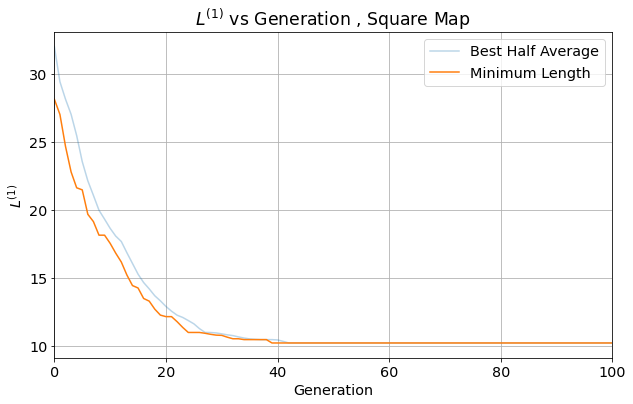

In [7]:
best = np.loadtxt("best_fitness_square.dat")
media = np.loadtxt("besthalf_fitness_square.dat")
x = np.arange(len(best))

plt.plot(x, media, label="Best Half Average", alpha=0.3)
plt.plot(x,best,label="Minimum Length")
plt.xlabel('Generation')
plt.ylabel('$L^{(1)}$')
plt.title( r'$L^{(1)}$ vs Generation , Square Map')
plt.grid(True)
plt.legend()
plt.xlim(0,100)
plt.show()

In this case, it cannot be stated with certainty that this is the best solution, but it remains a candidate for an optimal solution. It does not exhibit any evidence of non-optimality, such as intersections.